## Predicting  whether the mouse will still infected with virus after given two dosage measurements, on Healthcare dataset using Machine Learning algorithms.
<b> In this article, I am using Healthcare dataset as "mouse_viral_study.csv".     
    
<b>  In this article, we are going to predict whether the mouse will still infected with virus after given two dosage measurements, on Healthcare dataset using Machine Learning algorithms. The algorithms included SVM Algorithm.


## Step - 1 : Business Problem Understanding
<b> The data shown here simulates a medical study in which mice infected with a virus were given doses of two medicines and then checked 2 weeks later to see if they were still infected.
    
- <b> predict whether the mouse will still infected with virus after given two dosage, based on information about the two medicines such as Med_1_mL, Med_2_mL.
    
- <b> On the basis of this data, how should they predict whether the mouse will still infected with virus or not (Virus Present) ? 
    





<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv("mouse_viral_study.csv")

# Display the first 5 lines using the head() method.
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(400, 3)

<b> From the output, we can see that the table contains 400 rows and 3 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<b> int64 and float64 are the data types of our features. We see all 3 features are numeric (1 feature is int64 + 2 features are float64). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 400 observations, the same number of rows we saw before with shape.
    
    
<b> Here 3 variables or features (columns) are there, all 3 features are numeric (1 feature is int64 + 2 features are float64). The details of these variables as follows :
    
- Med_1_mL: First dose in mL
- Med_2_mL: Second dose in mL
- Virus Present: whether the mouse will still infected with virus or not (0 if not-infected, 1 if infected)
    

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
- <b> predict whether the mouse will still infected with virus after given two dosage, based on information about the two medicines such as Med_1_mL, Med_2_mL.
    
- <b> On the basis of this data, how should they predict whether the mouse will still infected with virus or not (Virus Present) ? 


   

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


<b> Visualizing after given two dosage whether the mouse will still infected with virus or not on raw data based on "Med_1_mL" and "Med_2_mL" by using scatterplot :

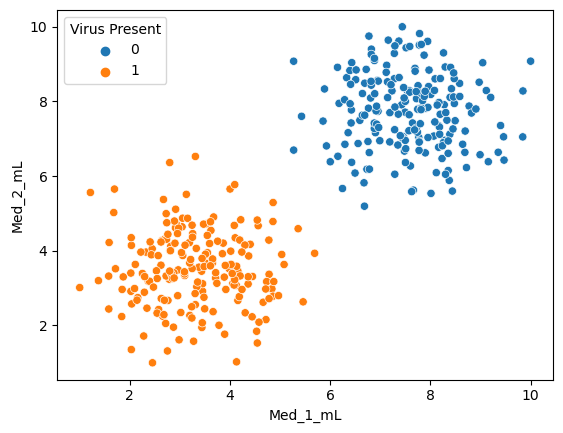

In [6]:
# Draw the scatterplot.
# Pass x as "Med_1_mL" and y as "Med_2_mL" variables.
# Pass hue="Virus Present"
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df)

# Display all figures.
plt.show()

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [7]:
# Check the missing values records.
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

<b> In the above, we can see that there is no missing values.
    

### 3.3 Train/Test Split
<b> Creating independent variables ("Med_1_mL", "Med_2_mL") as "x" variable and dependent variable "Virus Present" as "y" variable.

In [10]:
# Create x and y variables.
x = df[["Med_1_mL", "Med_2_mL"]]   # independent variables
y = df["Virus Present"]            # dependent variable

<b> In the above, I have created x variable with 2 independent (input) variables and y variable with 1 dependent (output) variable.

In [11]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [12]:
x_train.shape, x_test.shape

((320, 2), (80, 2))

In [13]:
y_train.shape, y_test.shape

((320,), (80,))

## Step - 4 : SVM Modelling with default Prameters:
<b> SVM Algorithm (Baseline Model)

In [28]:
# Modelling
# import the SVM from sklearn.svm library.
from sklearn.svm import SVC

# Create the classifier object (model) as "SVM_base_model".
SVM_base_model = SVC()

# Train the model using training sets
SVM_base_model.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = SVM_base_model.predict(x_train)

# Predict on the test data set.
test_predictions = SVM_base_model.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(SVM_base_model, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 1.0


In the above, we have fitted the SVC (support vector machine) classifier to the training data. First we have imported the SVC class of Sklearn.svm library. After importing the class, we have created the Classifier object of the class. The Parameter of this class are as :

- C (default=1.0): Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- kernel: Specifies the kernel type to be used in the algorithm. If none is given, 'rbf' will be used.
- degree (default=3): Degree of the polynomial kernel function (‘poly’). Must be non-negative.


And then we have fitted the classifier to the training data. After that we have predicted the test and train results.


And finally we have done with evaluation i.e. train accuracy, test accuray and crooss validation score.

<b> SVM Algorithm with default parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 100% with this model.

## Hyper Parameter Tuning for SVM classifier
<b> Here we are using GridSearchCV() function. GridSearchCV() function is used to identify the best value (parameter) within given dat by appling cross validation (CV).
    
<b> Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.
    
    
Here We will use these hyperparamters- c, kernal and CV : 
    
   - C (default=1.0): Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
   - kernel: Specifies the kernel type to be used in the algorithm. If none is given, 'rbf' will be used.
   - CV (default=5): Cross validation score.

   

In [23]:
# import the GridSearchCV from sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

# Model
estimator = SVC()

# Parameters and values.
param_grid = {'C':[0.01,0.02,0.1,1,10,100],'kernel':['rbf','poly','sigmoid','linear']}

# Identify the best value of the parameter within given values for the given data.
model_hp = GridSearchCV(estimator,param_grid,cv=5)

# fit the model on our train set.
model_hp.fit(x_train,y_train)

# get the best hyperparameters.
model_hp.best_params_

{'C': 0.01, 'kernel': 'rbf'}

<b> From the above, we have got the best parameter, i.e. c=0.01, kernal="rbf".

## Step - 4 : SVM Modelling with Best Hyper Prameters:
<b> Rebuilding the SVM Algorithm by using the best hyperparameters.

In [24]:
# Modelling
# import the SVM from sklearn.svm library.
from sklearn.svm import SVC

# Create the classifier object (model) as "SVM_base_model".
SVM_best_model = SVC()

# Train the model using training sets
SVM_best_model.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = SVM_best_model.predict(x_train)

# Predict on the test data set.
test_predictions = SVM_best_model.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(SVM_best_model, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 1.0


<b> From the above, SVM Algorithm with best parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 100% with this model.
    
    
<b> As we can see that the test accuracy of SVM Algorithm with best parameters is equal to the SVM Algorithm with default parameters. Hence we conclude that the SVM Algorithm with default parameters is a good model for this dataset, because it will take less time to build the model as compare to the SVM Algorithm with best parameters. we have got a good model on train and test data sets.

### Confusion Matrix 
- Now we will create the confusion matrix here to check the accuracy of the classification. To create it, we need to import the confusion_matrix function of the sklearn library. After importing the function. The function takes two parameters, mainly y_test( the actual values) and test_predictions (the targeted value return by the classifier). Below is the code for it :

In [29]:
# Creating the Confusion matrix 

# import the confusion_matrix class from sklearn.metrics library
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
# And pass the parameters.
confusion_matrix(y_test, test_predictions)


array([[38,  0],
       [ 0, 42]], dtype=int64)

<b> We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 38+42=80 (Correct Output) and 0+0=0 (Incorrect Output).

### Classification Report
- Now we are building the text report showing the main classification metrics, it will returns the text summary of the precision, recall, F1 score for each class.

In [30]:
# import the classification_report class from sklearn.metrics library
from sklearn.metrics import classification_report

# Calculate the classification_report
# pass the arrays (y_test and test_prediction)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### AUC-ROC
- It is one of the popular and important metrics for evaluating the performance of the classification model.
    

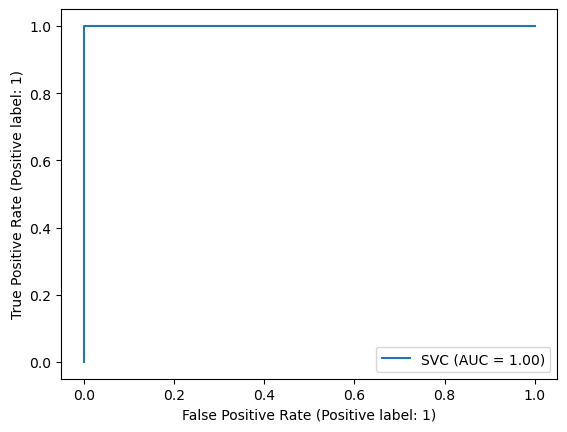

In [32]:
# import the plot_roc_curve class from sklearn.metrics library
from sklearn.metrics import plot_roc_curve

# plot the roc curve.
plot_roc_curve(SVM_base_model, x_test, y_test)

<b> The AUC-ROC curve result is 1.00, the AUC-ROC curve results were considered excellent for AUC values between 0.9-1. So it is a excellent (good) model.